<a href="https://colab.research.google.com/github/A23929/MDSC-302-Assignments/blob/main/22237_MDSC_302(P)_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
import pandas as pd
import torch
from torch.utils.data import Dataset,random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aniruddhapadmanaban","key":"f9fdfef7b2009572f9a4768f540991fd"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57           8977        295  1.0              
josephinelsy/spotify-top-hit-playlist-2010-2022            Spotify Top Hit Playlist (2010-2022)           210KB  2023-09-08 06:11:44           1597         48  1.0              
nelgiriyewithana/global-youtube-statistics-2023            Global YouTube Statistics 2023                  60KB  2023-07-28 15:36:38          18654        587  1.0              
muhammadtalhaawan/world-export-and-import-dataset          World Export & Import Dataset (1989 - 2023)    721K

In [ ]:
! kaggle competitions download -c Kannada-MNIST

 89% 11.0M/12.4M [00:00<00:00, 19.8MB/s]
100% 12.4M/12.4M [00:00<00:00, 14.5MB/s]


In [ ]:
! mkdir Kannada-MNIST

In [ ]:
! unzip Kannada-MNIST.zip -d Kannada-MNIST

Archive:  Kannada-MNIST.zip
  inflating: Kannada-MNIST/Dig-MNIST.csv  
  inflating: Kannada-MNIST/sample_submission.csv  
  inflating: Kannada-MNIST/test.csv  
  inflating: Kannada-MNIST/train.csv  


In [ ]:
training_data = pd.read_csv('/content/Kannada-MNIST/train.csv')
test_data = pd.read_csv('/content/Kannada-MNIST/test.csv')

In [ ]:
training_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
eig_val,eig_vec = np.linalg.eig(np.array((training_data.drop(training_data.columns[0],axis = 1)).cov()))

In [ ]:
eig_val = list(eig_val)
eig_val_contrib = [i/sum(eig_val) for i in eig_val]

In [ ]:
sum = 0
count = 0
for i in eig_val_contrib:
    if sum > 0.85:
        break
    sum = sum+i
    count = count + 1
print(f"The no of eigenvalues that contribute {sum} sum is {count}")

The no of eigenvalues that contribute (0.8514765183226758+0j) sum is 121


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

#define columns to use for PCA
df = training_data.iloc[:, 1:]

#define scaler
scaler = StandardScaler()

#create copy of DataFrame
scaled_df=df.copy()

#created scaled version of DataFrame
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

In [ ]:
from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA(n_components=4)

#fit PCA model to data
pca_fit = pca.fit(scaled_df)

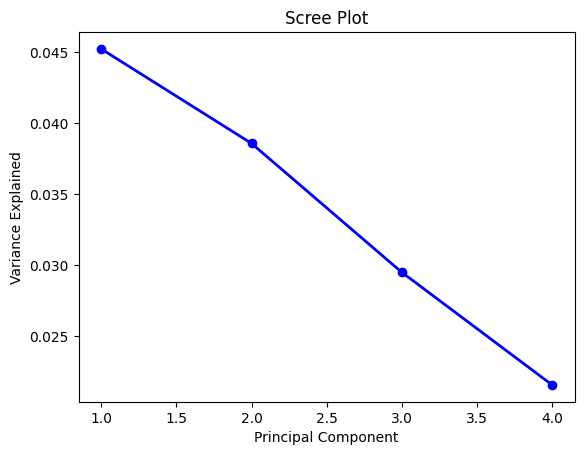

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
desired_variance = 0.85
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
best_n_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"Number of components to explain {desired_variance*100}% variance: {best_n_components}")

Number of components to explain 85.0% variance: 1


In [ ]:
#define PCA model to use
pca = PCA(n_components=121)

#fit PCA model to data
pca_fit = pca.fit(scaled_df)

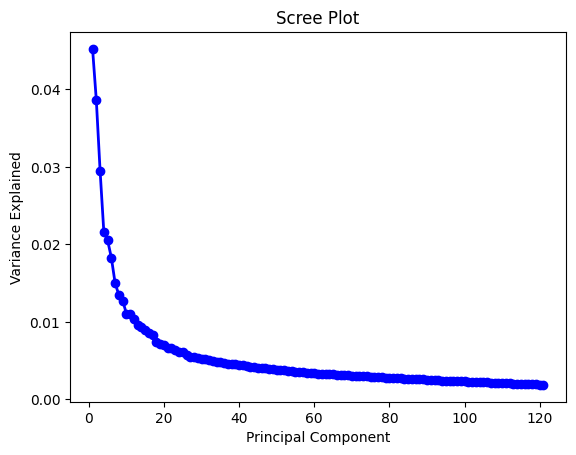

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
data = training_data.drop(training_data.columns[0],axis=1)

In [ ]:
data.shape

(60000, 784)

In [ ]:
projection_matrix = pd.DataFrame(eig_vec[0:121])

In [ ]:
projection_matrix = projection_matrix.T

In [ ]:
projection_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-0.000012+0.000000j,-0.000049+0.000000j,-0.000048+0.000000j,-0.000096+0.000000j,-0.000150+0.000000j,...,-0.000025+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-5.746927e-07+0.000000e+00j,-0.000138+0.000000j,-0.001555+0.000000j,-0.005661+0.000000j,-0.016967+0.000000j
1,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-0.000019+0.000000j,-0.000043+0.000000j,-0.000067+0.000000j,-0.000171+0.000000j,-0.000211+0.000000j,...,0.000035+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-1.160619e-05+0.000000e+00j,-0.000003+0.000000j,0.000251+0.000000j,0.001142+0.000000j,0.003994+0.000000j
2,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-0.000018+0.000000j,-0.000088+0.000000j,-0.000124+0.000000j,-0.000232+0.000000j,-0.000403+0.000000j,...,0.000013+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-2.200506e-05+0.000000e+00j,-0.000111+0.000000j,-0.001411+0.000000j,-0.005803+0.000000j,-0.018019+0.000000j
3,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.000022+0.000000j,0.000069+0.000000j,0.000011+0.000000j,0.000070+0.000000j,0.000139+0.000000j,...,-0.000016+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-1.090998e-05+0.000000e+00j,0.000003+0.000000j,0.000233+0.000000j,0.000605+0.000000j,-0.000368+0.000000j
4,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-0.000022+0.000000j,-0.000101+0.000000j,-0.000163+0.000000j,-0.000271+0.000000j,-0.000519+0.000000j,...,0.000026+0.000000j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,-8.332826e-06+0.000000e+00j,-0.000027+0.000000j,-0.000704+0.000000j,-0.003455+0.000000j,-0.011757+0.000000j


In [ ]:
projection_matrix.shape

(784, 121)

In [ ]:
class K(Dataset):
    def __init__(self, df, transform=None, target_transform=None):
        self.img_labels = df.iloc[:,0]
        # self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        self.df = df

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        #img_path = os.path.join( self.img_labels.iloc[idx, 0])
        image = (self.df.iloc[idx,1:].values)
        image = torch.tensor(image)
        label = self.img_labels.iloc[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


In [ ]:
tr = K(training_data)

In [ ]:
ts = K(training_data)

In [ ]:
train_size = int(0.9*(len(tr)))
val_size = len(tr) - train_size
train_set, val_set = random_split(tr, [train_size, val_size])

In [ ]:
from torch.utils.data import DataLoader, random_split

train_dataloader = DataLoader(train_set, batch_size=64, shuffle=True)
test_dataloader = DataLoader(ts, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_set,batch_size = 64,shuffle=True)

Feature batch shape: torch.Size([64, 784])
Labels batch shape: torch.Size([64])


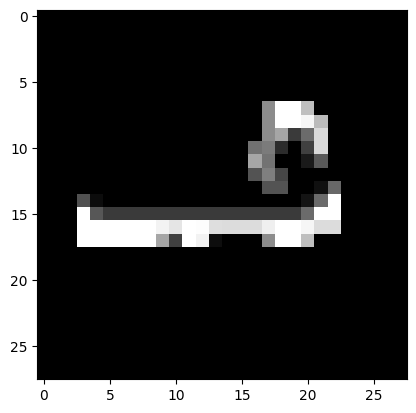

Label: 2


In [ ]:
train_features,train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].reshape(28,28).squeeze()
label = train_labels[0]
plt.imshow(img,cmap='gray')
plt.show()
print(f"Label: {label}")

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
import torch.nn.functional as F

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,1000)#just a random Neural Network with 6 Hidden Layers
        self.fc2 = nn.Linear(1000,500)
        self.fc3 = nn.Linear(500,250)
        self.fc4 = nn.Linear(250,112)
        self.fc5 = nn.Linear(112,250)
        self.fc6 = nn.Linear(250,500)

    def forward(self,x):
        x = F.relu(self.fc1(x.float()))# using a common Activation Function
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        output = F.relu(self.fc6(x))
        return output


In [ ]:
model = NeuralNetwork()

In [ ]:
model.cuda

<bound method Module.cuda of NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=250, bias=True)
  (fc4): Linear(in_features=250, out_features=112, bias=True)
  (fc5): Linear(in_features=112, out_features=250, bias=True)
  (fc6): Linear(in_features=250, out_features=500, bias=True)
)>

In [ ]:
device = torch.device("cuda:0")
model.to(device)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=250, bias=True)
  (fc4): Linear(in_features=250, out_features=112, bias=True)
  (fc5): Linear(in_features=112, out_features=250, bias=True)
  (fc6): Linear(in_features=250, out_features=500, bias=True)
)

In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)

In [ ]:
epochs = 10

In [ ]:
class Encoder(nn.Module):
  def __init__(self, n_in, n_hidden_1, n_hidden_2, n_hidden_3, n_out):
    super(Encoder, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Linear(n_in, n_hidden_1, bias=True),
        nn.BatchNorm1d(n_hidden_1),
        nn.Sigmoid())
    self.layer2 = nn.Sequential(
        nn.Linear(n_hidden_1, n_hidden_2, bias=True),
        nn.BatchNorm1d(n_hidden_2),
        nn.Sigmoid())
    self.layer3 = nn.Sequential(
        nn.Linear(n_hidden_2, n_hidden_3, bias=True),
        nn.BatchNorm1d(n_hidden_3),
        nn.Sigmoid())
    self.layer4 = nn.Sequential(
        nn.Linear(n_hidden_3, n_out, bias=True),
        nn.BatchNorm1d(n_out),
        nn.Sigmoid())

  def forward(self, x):
    x = self.layer1(x.float())
    x = self.layer2(x)
    x = self.layer3(x)
    return self.layer4(x)

class Decoder(nn.Module):
  def __init__(self, n_in, n_hidden_1, n_hidden_2, n_hidden_3, n_out):
    super(Decoder, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Linear(n_in, n_hidden_1, bias=True),
        nn.BatchNorm1d(n_hidden_1),
        nn.Sigmoid())
    self.layer2 = nn.Sequential(
        nn.Linear(n_hidden_1, n_hidden_2, bias=True),
        nn.BatchNorm1d(n_hidden_2),
        nn.Sigmoid())
    self.layer3 = nn.Sequential(
        nn.Linear(n_hidden_2, n_hidden_3, bias=True),
        nn.BatchNorm1d(n_hidden_3),
        nn.Sigmoid())
    n_size = 28
    self.layer4 = nn.Sequential(
        nn.Linear(n_hidden_3, n_out, bias=True),
        nn.BatchNorm1d(n_out),
        nn.Sigmoid())
  def forward(self, x):
    x = self.layer1(x.float())
    x = self.layer2(x)
    x = self.layer3(x)
    return self.layer4(x)

In [ ]:
encoder = Encoder(784, 1000, 500, 250, 2)
decoder = Decoder(2, 250, 500, 1000, 784)

In [ ]:
for epoch in range(epochs):
  for input, labels in train_dataloader:
    optimizer.zero_grad()
    code = encoder(input)
    output = decoder(code)
    loss = loss_fn(output, input)
    optimizer.step()
  print(f"Epoch: {epoch} Loss: {loss}")

Epoch: 0 Loss: 4048.84619140625
Epoch: 1 Loss: 4127.1904296875
Epoch: 2 Loss: 4365.8837890625
Epoch: 3 Loss: 4102.06201171875
Epoch: 4 Loss: 4356.6611328125
Epoch: 5 Loss: 4471.92626953125
Epoch: 6 Loss: 3828.498291015625
Epoch: 7 Loss: 4450.64990234375
Epoch: 8 Loss: 4442.4130859375
Epoch: 9 Loss: 4109.7431640625
